![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [36]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [37]:
df = pd.get_dummies(penguins_df, columns=['sex'],drop_first= True)


In [38]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df.shape

(332, 5)

In [39]:
k_values = range(1, 15)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) 

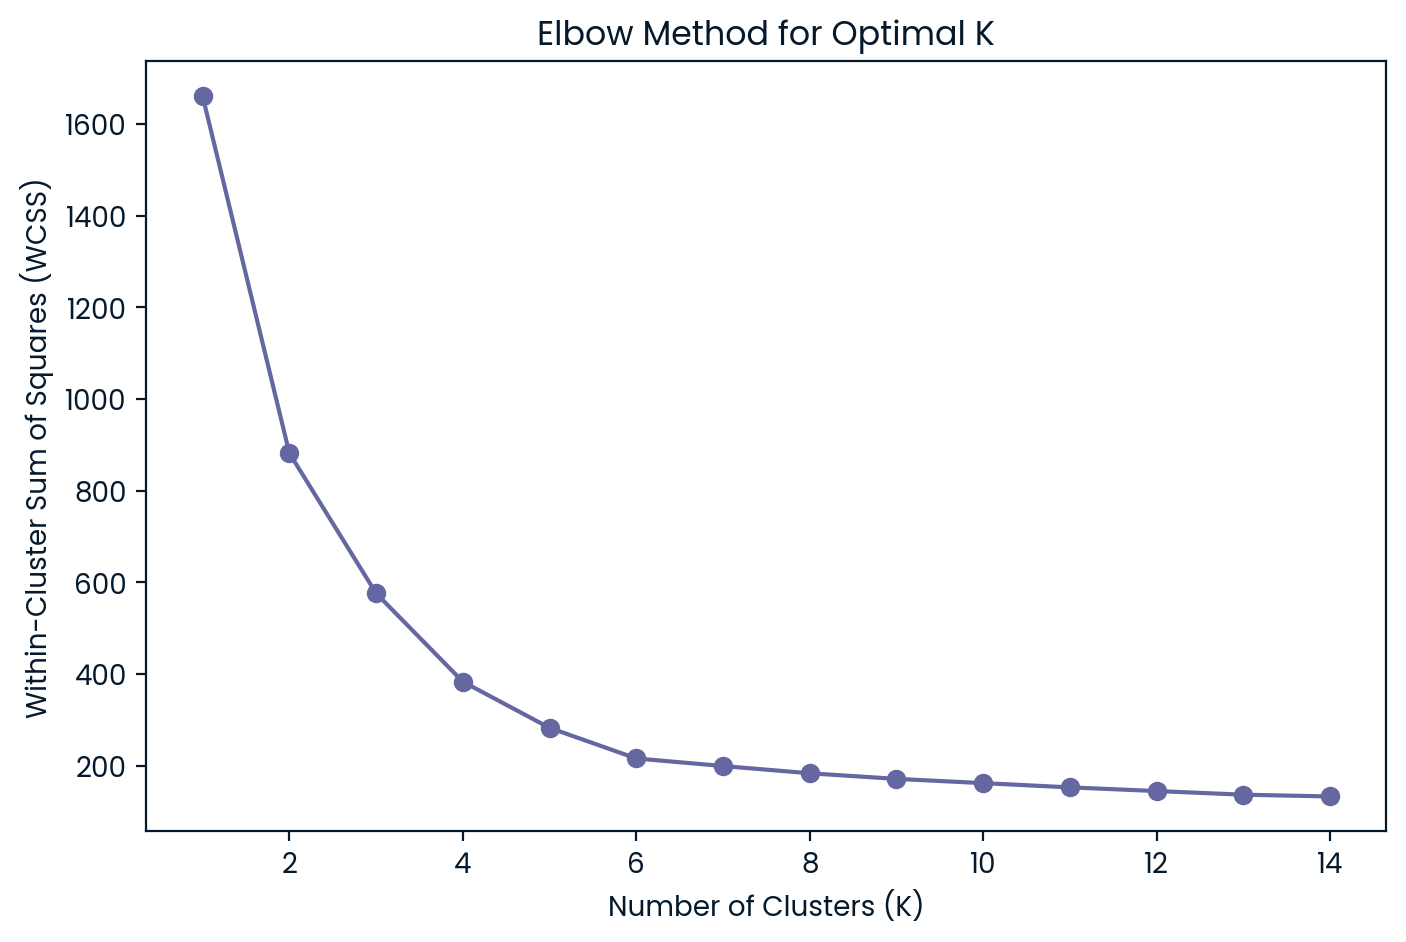

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [41]:
kmeans2 = KMeans(8, random_state=0)
kmeans2.fit(df)


KMeans(random_state=0)

In [42]:
penguins_df['cluster_label']= kmeans2.labels_

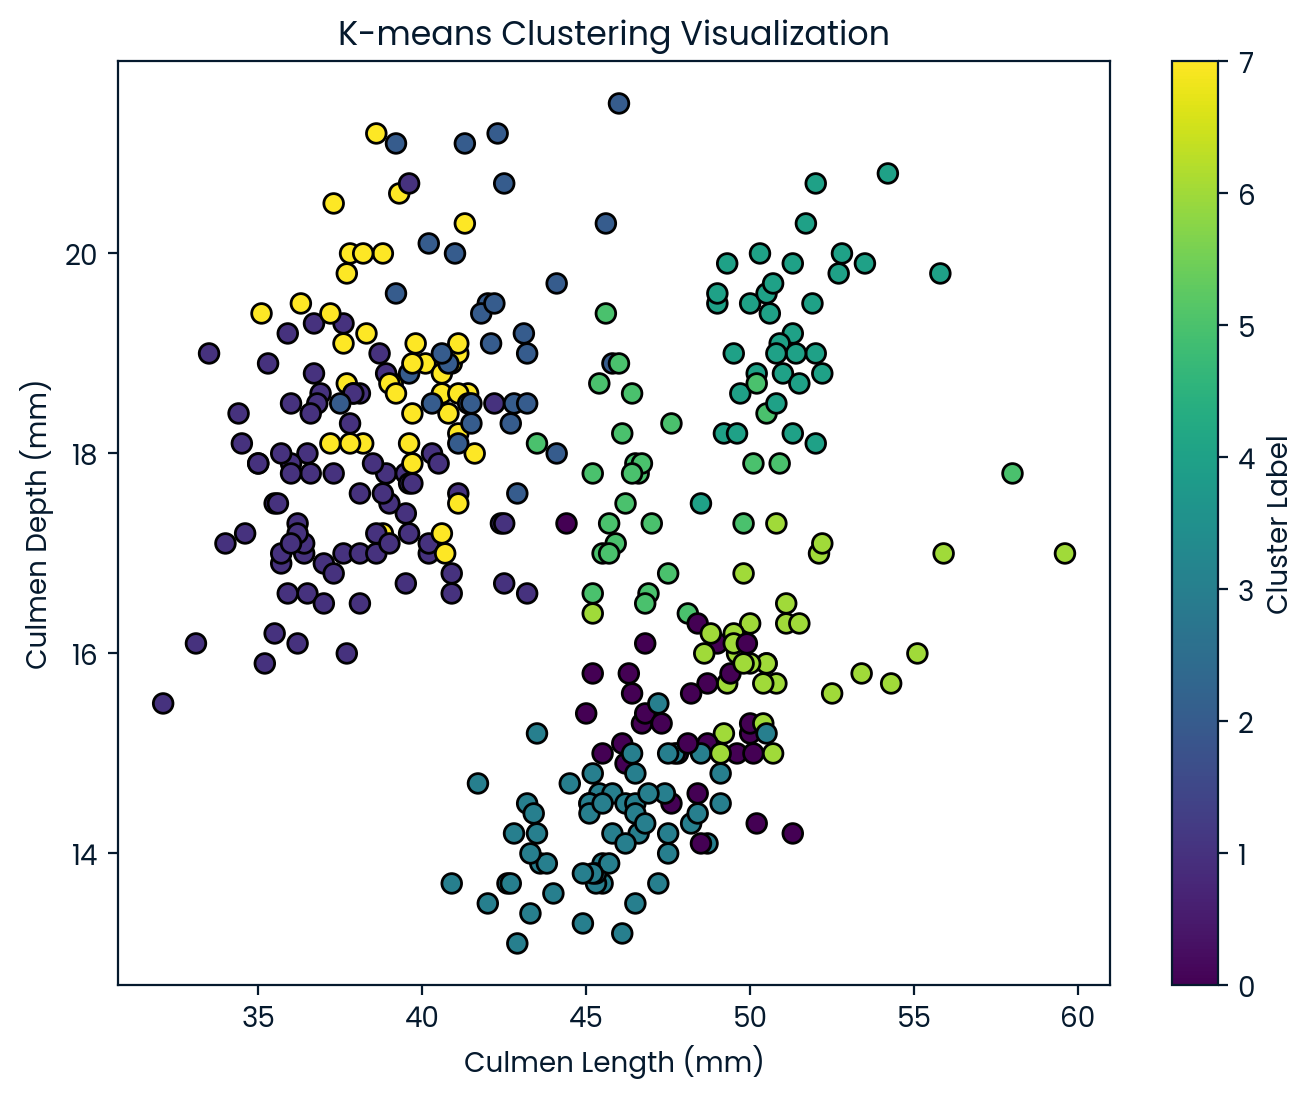

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=penguins_df['cluster_label'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('K-means Clustering Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

In [44]:
kmeans3 = KMeans(13, random_state=0)
kmeans3.fit(df)

KMeans(n_clusters=13, random_state=0)

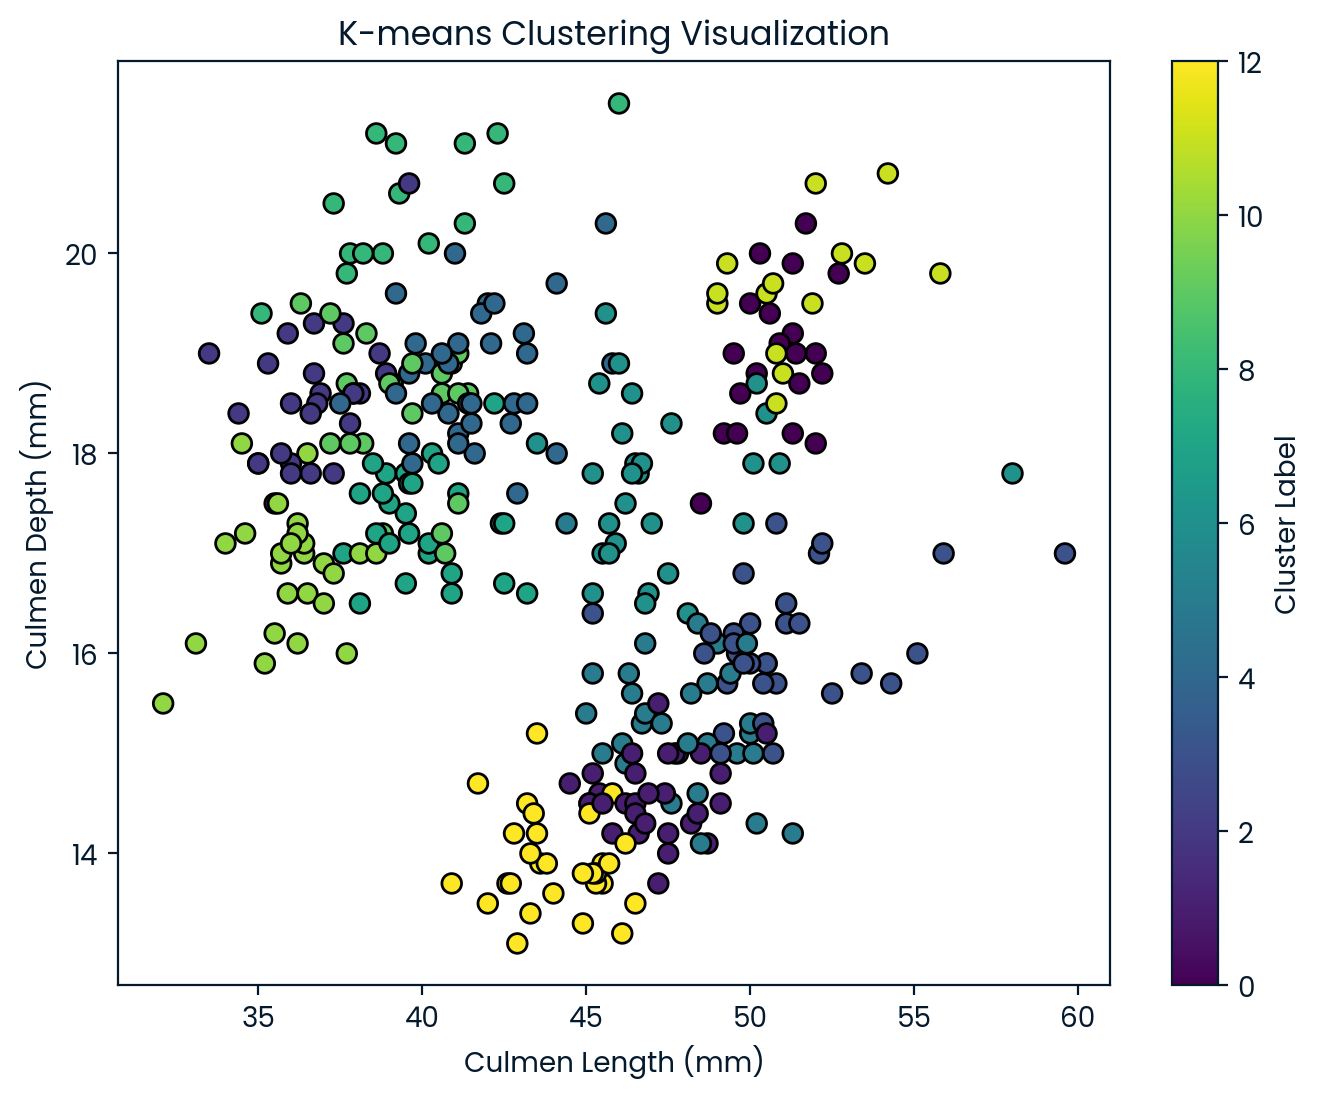

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=kmeans3.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('K-means Clustering Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

In [46]:
numeric_columns = penguins_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaled_data = scaler.fit_transform(penguins_df[numeric_columns])

In [47]:
kmeans4 = KMeans(n_clusters=7, random_state=42)  # Adjust the number of clusters as needed
kmeans4.fit(scaled_data)

KMeans(n_clusters=7, random_state=42)

In [48]:
penguins_df['label'] = kmeans.labels_


In [49]:
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,50.795000,18.965000,196.000000,3738.750000
1,47.017241,14.565517,213.620690,4828.448276
2,36.936842,18.815789,186.842105,3469.736842
3,51.009677,16.090323,225.612903,5666.129032
4,41.561765,18.779412,195.823529,4259.558824
5,47.886667,15.333333,217.333333,5297.500000
6,47.310345,17.706897,192.758621,3569.827586
7,36.988235,17.511765,191.941176,3538.235294
8,39.706667,20.500000,193.866667,3996.666667
